In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
seed = 42
np.random.seed(seed)

In [4]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine1.MotorAmperage.U.Actual", "Machine2.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual",
             "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual",
             "Machine4.Temperature1.C.Actual", "Machine4.Temperature2.C.Actual", "Machine4.Temperature3.C.Actual", "Machine4.Pressure.C.Actual",
             "Machine5.Temperature1.C.Actual", "Machine5.Temperature2.C.Actual", "Machine5.Temperature5.C.Actual"]

In [5]:
y_drop_cols = ["Stage1.Output.Measurement0.U.Actual", "Stage1.Output.Measurement0.U.Setpoint",
               "Stage1.Output.Measurement1.U.Actual", "Stage1.Output.Measurement1.U.Setpoint",
               "Stage1.Output.Measurement2.U.Actual", "Stage1.Output.Measurement2.U.Setpoint",
               "Stage1.Output.Measurement3.U.Actual", "Stage1.Output.Measurement3.U.Setpoint",
               "Stage1.Output.Measurement4.U.Actual", "Stage1.Output.Measurement4.U.Setpoint",
               "Stage1.Output.Measurement5.U.Actual", "Stage1.Output.Measurement5.U.Setpoint",
               "Stage1.Output.Measurement6.U.Actual", "Stage1.Output.Measurement6.U.Setpoint",
               "Stage1.Output.Measurement7.U.Actual", "Stage1.Output.Measurement7.U.Setpoint",
               "Stage1.Output.Measurement8.U.Actual", "Stage1.Output.Measurement8.U.Setpoint",
               "Stage1.Output.Measurement9.U.Actual", "Stage1.Output.Measurement9.U.Setpoint",
               "Stage1.Output.Measurement10.U.Actual", "Stage1.Output.Measurement10.U.Setpoint",
               "Stage1.Output.Measurement11.U.Actual", "Stage1.Output.Measurement11.U.Setpoint",
               "Stage1.Output.Measurement12.U.Actual", "Stage1.Output.Measurement12.U.Setpoint",
               "Stage1.Output.Measurement13.U.Actual", "Stage1.Output.Measurement13.U.Setpoint",
               "Stage1.Output.Measurement14.U.Actual", "Stage1.Output.Measurement14.U.Setpoint"]

In [6]:
df0_indexed = pd.read_csv("../Data/s2_df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :86], df0_indexed.iloc[:, 86:88]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)
X0_reduced.drop(y_drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [7]:
X0_reduced.shape

(12158, 35)

In [14]:
def base_model():
    # create model
    model = Sequential()
    model.add(Dense(35, input_dim=35, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [15]:
estimators = []
estimators.append(('robust', RobustScaler()))
estimators.append(('kerasReg', KerasRegressor(build_fn=base_model, epochs=20, batch_size=10, verbose=1)))

In [16]:
pipe = Pipeline(estimators)

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [18]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_reduced, y0_Actual, test_size=0.2, random_state=seed)

In [19]:
cross_val_score(pipe, X0_train, y0_train, cv=kfold, n_jobs=1)

Epoch 1/20
778/778 [==============================] - 1s 828us/step - loss: 11.4367
Epoch 2/20
778/778 [==============================] - 1s 725us/step - loss: 1.1311
Epoch 3/20
778/778 [==============================] - 1s 707us/step - loss: 0.4092
Epoch 4/20
778/778 [==============================] - 1s 735us/step - loss: 0.1232
Epoch 5/20
778/778 [==============================] - 1s 729us/step - loss: 0.0549
Epoch 6/20
778/778 [==============================] - 1s 722us/step - loss: 0.0427
Epoch 7/20
778/778 [==============================] - 1s 708us/step - loss: 0.0409
Epoch 8/20
778/778 [==============================] - 1s 717us/step - loss: 0.0391
Epoch 9/20
778/778 [==============================] - 1s 744us/step - loss: 0.0398
Epoch 10/20
778/778 [==============================] - 1s 760us/step - loss: 0.0387
Epoch 11/20
778/778 [==============================] - 1s 753us/step - loss: 0.0383
Epoch 12/20
778/778 [==============================] - 1s 729us/step - loss: 0.0369


779/779 [==============================] - 1s 759us/step - loss: 0.0275
Epoch 16/20
779/779 [==============================] - 1s 752us/step - loss: 0.0272
Epoch 17/20
779/779 [==============================] - 1s 747us/step - loss: 0.0265
Epoch 18/20
779/779 [==============================] - 1s 752us/step - loss: 0.0259
Epoch 19/20
779/779 [==============================] - 1s 756us/step - loss: 0.0279
Epoch 20/20
195/195 [==============================] - 0s 596us/step - loss: 0.0432


array([-0.01979443, -0.02397183, -0.02430634, -0.02094509, -0.04323018])

In [20]:
pipe.fit(X0_train, y0_train)

Epoch 1/20
973/973 [==============================] - 1s 756us/step - loss: 10.1616
Epoch 2/20
973/973 [==============================] - 1s 764us/step - loss: 0.8865
Epoch 3/20
973/973 [==============================] - 1s 768us/step - loss: 0.2172
Epoch 4/20
973/973 [==============================] - 1s 762us/step - loss: 0.0615
Epoch 5/20
973/973 [==============================] - 1s 768us/step - loss: 0.0416
Epoch 6/20
973/973 [==============================] - 1s 768us/step - loss: 0.0378
Epoch 7/20
973/973 [==============================] - 1s 755us/step - loss: 0.0380
Epoch 8/20
973/973 [==============================] - 1s 779us/step - loss: 0.0357
Epoch 9/20
973/973 [==============================] - 1s 811us/step - loss: 0.0363
Epoch 10/20
973/973 [==============================] - 1s 747us/step - loss: 0.0331
Epoch 11/20
973/973 [==============================] - 1s 771us/step - loss: 0.0322
Epoch 12/20
973/973 [==============================] - 1s 827us/step - loss: 0.0322


Pipeline(steps=[('robust', RobustScaler()),
                ('kerasReg',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BE0A379DA0>)])

In [21]:
y0_pred = pipe.predict(X0_test)

244/244 [==============================] - 0s 671us/step


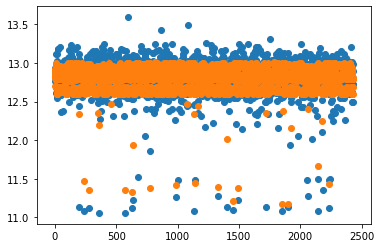

In [22]:
plt.scatter(np.arange(len(X0_test)), y0_test)
plt.scatter(np.arange(len(X0_test)), y0_pred)

1216/1216 [==============================] - 1s 520us/step


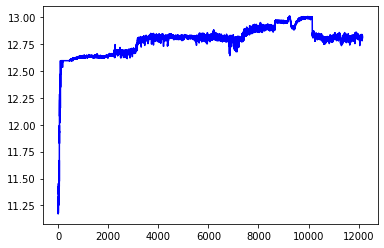

In [24]:
plt.plot(pipe.predict(X0_reduced), "b")

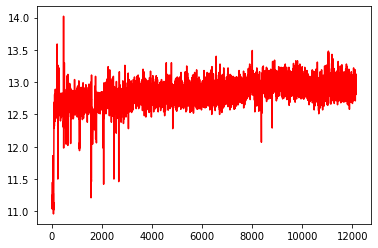

In [25]:
plt.plot(y0_Actual, "r")

In [23]:
# mse
pipe.score(X0_test, y0_test)

244/244 [==============================] - 0s 589us/step - loss: 0.0259


-0.02589329704642296

In [31]:
rmse = np.sqrt(mean_squared_error(y0_pred, y0_test))
rmse

0.16091394291083952